In [1]:
#load libraries
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

In [2]:
#get our training and test data
traindata = pd.read_csv('dataset/sign_mnist_train.csv')
testdata = pd.read_csv('dataset/sign_mnist_test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/sign_mnist_train.csv'

In [ ]:
trainlabel=traindata['label'].values
traindata.drop('label',inplace=True,axis=1)
trainimages = traindata.values

testlabel=testdata['label'].values
testdata.drop('label',inplace=True,axis=1)
testimages = testdata.values


In [ ]:
trainimages=trainimages.reshape(-1,28,28,1)

testimages=testimages.reshape(-1,28,28,1)

In [ ]:
print(trainimages.shape)
print(trainlabel.shape)

print(testimages.shape)
print(testlabel.shape)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
traingen=ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            horizontal_flip=True,
            vertical_flip=False,
            brightness_range=[1.0,2.0],
            rescale=1./255.0)
traindata_generator = traingen.flow(trainimages,trainlabel, batch_size=128)

testgen=ImageDataGenerator(rescale=1./255.0)
validationdata_generator = testgen.flow(testimages,testlabel, batch_size=128)

In [ ]:
model=Sequential()

model.add(Conv2D(256,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(1024,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(2048,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(26,activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 256)       295168    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 512)         1180160   
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 512)       

In [ ]:
history=model.fit(traindata_generator,epochs=50,validation_data=validationdata_generator)

Epoch 1/50
215/215 [==============================] - 4216s 20s/step - loss: 2.6572 - accuracy: 0.1775 - val_loss: 1.6547 - val_accuracy: 0.4646
Epoch 2/50
215/215 [==============================] - 474s 2s/step - loss: 1.4785 - accuracy: 0.5094 - val_loss: 0.8378 - val_accuracy: 0.7257
Epoch 3/50
215/215 [==============================] - 358s 2s/step - loss: 0.9480 - accuracy: 0.6817 - val_loss: 0.5251 - val_accuracy: 0.8206
Epoch 4/50
215/215 [==============================] - 325s 2s/step - loss: 0.7013 - accuracy: 0.7667 - val_loss: 0.4067 - val_accuracy: 0.8583
Epoch 5/50
215/215 [==============================] - 3089s 14s/step - loss: 0.5705 - accuracy: 0.8085 - val_loss: 0.3047 - val_accuracy: 0.8905
Epoch 6/50
215/215 [==============================] - 348s 2s/step - loss: 0.4520 - accuracy: 0.8483 - val_loss: 0.2096 - val_accuracy: 0.9334
Epoch 7/50
215/215 [==============================] - 352s 2s/step - loss: 0.3851 - accuracy: 0.8730 - val_loss: 0.1448 - val_accuracy: 0.

In [ ]:
#saving the CNN training Accuracy to local folder 
_, acc_train = model.evaluate(traindata_generator)
print('CNN_SA Training Accuracy : %0.2f%%' % (acc_train * 100))

trainingAcc = ("%0.2f%%" % (acc_train * 100))
np.save('SA/50epoch_SA_trainingAccuracy.npy', trainingAcc)

#saving the CNN test Accuracy to local folder 
_, acc_test = model.evaluate(validationdata_generator)
print('CNN_SA Test Accuracy : %0.2f%%' % (acc_test * 100))

TestAcc = ("%0.2f%%" % (acc_test * 100))
np.save('SA/50epoch_SA_testAccuracy.npy', TestAcc)

215/215 [==============================] - 82s 371ms/step - loss: 0.1039 - accuracy: 0.9659
CNN_SA Training Accuracy : 96.59%
57/57 [==============================] - 18s 286ms/step - loss: 0.0504 - accuracy: 0.9901
CNN_SA Test Accuracy : 99.01%


In [ ]:
#save our model
model.save("SA/50epoch_SA_Model.h5")
print("Model Saved")

Model Saved


In [ ]:
#saving the CNN training history to local folder 
np.save('SA/50epoch_SA_history.npy', history.history)

#load the CNN training validation accuracy to local folder 
val_accuracy = np.load('SA/50epoch_SA_testAccuracy.npy', allow_pickle='TRUE').item()
#print('%0.2f%%' % (val_accuracy * 100))

#load the CNN training history from local folder
history = np.load('SA/50epoch_SA_history.npy', allow_pickle='TRUE').item()

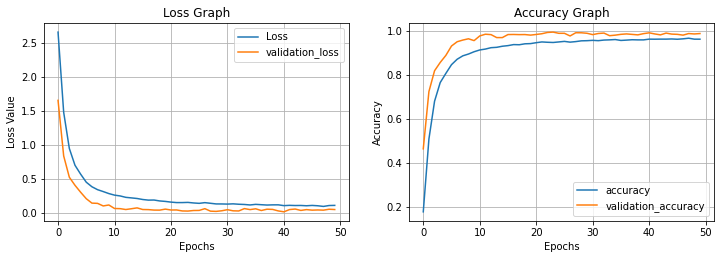

In [ ]:
#Plotting the accuracy training using graph presentation CNN
plt.figure(figsize = (12, 8))

plt.subplot(2, 2, 1)
plt.ylabel('Loss Value')
plt.xlabel('Epochs')
plt.plot(history['loss'], label='Loss')
plt.plot(history['val_loss'], label='validation_loss')
plt.legend()
plt.grid()
plt.title('Loss Graph')

plt.subplot(2, 2, 2)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy Graph')

plt.show()